In [17]:
from sklearn.datasets import load_digits
import tensorflow as tf 
from tensorflow import keras 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [12]:
data=pd.read_csv('AirPassengers.csv')

In [14]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [15]:
data.shape

(144, 2)

In [16]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
datat=data[["#Passengers"]].values
datat.shape

(144, 1)

# preaparation des donnes

In [25]:
sc=MinMaxScaler(feature_range=(0,1))
data_scaled=sc.fit_transform(datat)
data_scaled.shape

(144, 1)

In [24]:
X_data=[]
y_data=[]
look_back=1 # le nombre de mois qu'on prend 
for i in range(len(data_scaled)-1):
    X_data.append(data_scaled[i:i+look_back,0])
    y_data.append(data_scaled[i+look_back,0])
X_data,y_data=np.array(X_data),np.array(y_data)

In [26]:
#reshaping
X_data=np.reshape(X_data,(X_data.shape[0],X_data.shape[1],1))


In [27]:
X_data.shape

(143, 1, 1)

In [28]:
# split data into test and train
train_size=int(len(X_data)*0.7)
test_size=len(X_data)-train_size
X_train=X_data[0:train_size,:]
X_test=X_data[train_size:len(X_data),:]
y_train=y_data[0:train_size]
y_test=y_data[train_size:len(y_data)]



# construction de RNN

In [41]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(tf.keras.layers.LSTM(units=50,return_sequences=True))
model.add(tf.keras.layers.LSTM(units=50,return_sequences=True))
model.add(tf.keras.layers.LSTM(units=50))
# ajouter la couche de sortie 
model.add(tf.keras.layers.Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
tensorboard_callback=keras.callbacks.TensorBoard( log_dir='tb_callback_dir', histogram_freq=1)# pour visualiser les courbes avec tensorBoard
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
lstm_9 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
lstm_10 (LSTM)               (None, 1, 50)             20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train,y_train,epochs=100,batch_size=32,callbacks=[tensorboard_callback],verbose=1 )

Epoch 1/100
4/4 [==============================] - 0s 30ms/step - loss: 0.0699
Epoch 2/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0639
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0580
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0517
Epoch 5/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0450
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0382
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0318
Epoch 8/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0256
Epoch 9/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0212
Epoch 10/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0190
Epoch 11/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0191
Epoch 12/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0206
Epoch 13/100
4/4 [==============================]

In [33]:
y_pred=model.predict(X_test)

# visualiser les resultas

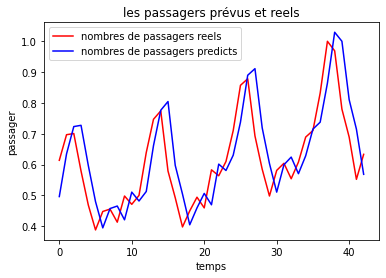

In [34]:
plt.plot(y_test,color='red',label="nombres de passagers reels")
plt.plot(y_pred,color='blue',label="nombres de passagers predicts")
plt.title('les passagers prévus et reels')
plt.xlabel('temps')
plt.ylabel('passager')
plt.legend()
plt.show()

In [39]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.0101


0.010074859485030174